In [77]:
# imports

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import category_encoders as ce
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from pdpbox import pdp, info_plots

In [19]:
# read in the dataset
df = pd.read_csv("/Users/imac/DAT07-28-AG/Homework/Unit3/data/housing.csv")

In [20]:
# see what is in the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
# see shape of dataset. 506 rows and 14 columns

df.shape

(506, 14)

In [22]:
# see data type info about dataset. All data entries are either integers or floats, there are no null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [23]:
# Declare X & y. the target variable (y) will be PRICE and everything else will be X
X = df.drop("PRICE", axis=1)
y = df["PRICE"]

In [24]:
# initalise GradientBoostingRegressor & OrdinalEncoder
# create pipeline with column encoder
gbm = GradientBoostingRegressor(n_estimators=1000)
ore = ce.OrdinalEncoder()
pipe = make_pipeline(ore, gbm)

In [25]:
# Cross validation - create training & test sets
# test set will be 20% of the total data
# data set does not include dates / times so can be randomly shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1990)

In [26]:
X_train.shape

(404, 13)

In [27]:
X_test.shape

(102, 13)

In [28]:
y_train.shape

(404,)

In [29]:
y_test.shape

(102,)

In [30]:
# Divide training set again, creating a validation set for testing
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1990)

In [31]:
# fit the model on the training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=1000))])

In [32]:
# get 10-fold validation score for the training set. 
cv_scores = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10)

# Scores range from 0.702 - 0.938
cv_scores

array([0.70436761, 0.93997366, 0.89120088, 0.78052954, 0.82731253,
       0.74045178, 0.67965059, 0.93843062, 0.85510759, 0.81857696])

In [33]:
# taking the mean of all the cv_scores to use to check validation
cv_scores.mean()

0.817560175918997

In [34]:
# score on val set
pipe.score(X_val, y_val)

0.9244309880300601

In [35]:

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [36]:
# see values from feature_importances; i.e. how important is each column to the PRICE?
gbm.feature_importances_

array([3.45594237e-02, 3.03094619e-04, 1.45776744e-03, 1.20600982e-03,
       3.06026913e-02, 3.77282729e-01, 1.37108657e-02, 5.20500580e-02,
       5.18321143e-03, 1.79272870e-02, 3.95862129e-02, 1.01637979e-02,
       4.15966851e-01])

In [37]:
# sort importance values into a table to make them easier to understand
feats = pd.DataFrame({
    'Columns': X.columns,
    'Importance': gbm.feature_importances_
})

# sort in order of highest importance
# the majority of PRICE (0.79) is a result of RM and LSTAT; therefore will add a feature incorporating these two variables (RM * LSTAT)
feats.sort_values(by='Importance', ascending=False)

,Columns,Importance
12,LSTAT,0.415967
5,RM,0.377283
7,DIS,0.052050
10,PTRATIO,0.039586
0,CRIM,0.034559
4,NOX,0.030603
9,TAX,0.017927
6,AGE,0.013711
11,B,0.010164
8,RAD,0.005183


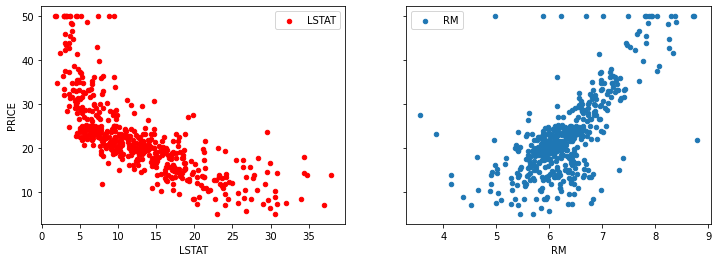

In [38]:
# see what the relationship between Price and LSTAT looks like
# negative correlation; i.e. the lower LSTAT, the higher the price, especially at  subplots(1, 2, sharex=True, sharey=True, figsize=(12, 4))
# LSTAT outliers: some outliers at upper end of PRICE, and at upper end of LSTAT. 
# RM outliers: many more outliers in RM; maybe removing the outliers will improve the score 

fig, ax = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(12, 4))
df.plot("LSTAT", "PRICE", kind="scatter", ax=ax[0], color="red", label="LSTAT");
df.plot("RM", "PRICE", kind="scatter", ax=ax[1], label="RM");

In [39]:
df["RM"].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

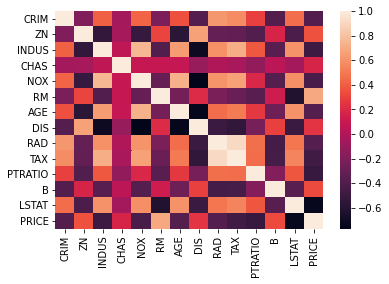

In [40]:
# use heatmap to understand if there are any relationships between variables 
# RM has highest positive correlation with PRICE; I can try multiplying RM with other variables highly correlated with RM (e.g. )
sns.heatmap(df.corr())

In [41]:
# check if any columns can be added to improve score
# LSTAT and RM are the biggest contributors to PRICE (albeit strongly negatively correlated with each other) so will multiply to see if any additional effect
df["LSTAT to Room"] = df["LSTAT"] * df["RM"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,LSTAT to Room
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,32.74350
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,58.68794
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,28.95555
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,20.57412
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,38.09351


In [42]:
X = df.drop("PRICE", axis=1)
y = df["PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1990)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1990)

In [43]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=1000))])

In [44]:
# get 10-fold validation score for the training set. 
cv_scores = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10)

# Scores have improved to 0.70 - 0.94 range
cv_scores

array([0.71061402, 0.92633169, 0.89887028, 0.72621576, 0.82614937,
       0.79488552, 0.70952265, 0.92102196, 0.86408282, 0.83629982])

In [45]:
cv_scores.mean()

0.8213993898422375

In [46]:
# Score on validation set; marginal improvement 
pipe.score(X_val, y_val)

0.9213025965433826

In [47]:
df["RM_CRIM_TAX"] = df["RM"] * df["CRIM"] * df["TAX"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,LSTAT to Room,RM_CRIM_TAX
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,32.74350,12.299984
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,58.68794,42.436517
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,28.95555,47.451033
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,20.57412,50.288608
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,38.09351,109.557078


In [48]:
X = df.drop("PRICE", axis=1)
y = df["PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1990)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1990)
pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=1000))])

In [49]:
# get 10-fold validation score for the training set. 
cv_scores = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10)

# Scores have improved to 0.70 - 0.94 range
cv_scores

array([0.67242196, 0.92099677, 0.89211897, 0.71806275, 0.82149625,
       0.77596154, 0.73094769, 0.93480821, 0.88442497, 0.81815362])

In [50]:
# marginal improvement in average score
cv_scores.mean()

0.8169392735930217

In [51]:
pipe.score(X_val, y_val)

0.9278156661505769

In [52]:
df["LSTAT_INDUS_NOX"] = df["LSTAT"] * df["INDUS"] * df["NOX"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,LSTAT to Room,RM_CRIM_TAX,LSTAT_INDUS_NOX
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,32.74350,12.299984,6.189044
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,58.68794,42.436517,30.306686
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,28.95555,47.451033,13.362795
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,20.57412,50.288608,2.935414
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,38.09351,109.557078,5.321685


In [53]:
# rerun model on training set
X = df.drop("PRICE", axis=1)
y = df["PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1990)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1990)
pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=1000))])

In [54]:
# get 10-fold validation score for the training set. 
cv_scores = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10)

# Scores have improved to 0.70 - 0.94 range
cv_scores

array([0.68936187, 0.92612967, 0.87416659, 0.7014937 , 0.82295561,
       0.7443813 , 0.70639686, 0.93366341, 0.86628036, 0.80527345])

In [55]:
# average score has fallen so will remove the last column added
cv_scores.mean()

0.8070102829992031

In [56]:
pipe.score(X_val, y_val)

0.9228321863800422

In [57]:
# drop the latest column added, rerun model on training set
df = df.drop(["LSTAT_INDUS_NOX"], axis=1)
X = df.drop("PRICE", axis=1)
y = df["PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1990)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1990)
pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=1000))])

In [58]:
# get 10-fold validation score for the training set. 
cv_scores = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10)

# Scores have improved to 0.70 - 0.94 range
cv_scores

array([0.6741811 , 0.92138776, 0.88875126, 0.7409182 , 0.82436016,
       0.75171303, 0.71895687, 0.93469842, 0.88410937, 0.81656709])

In [59]:
cv_scores.mean()

0.8155643264230369

In [60]:
pipe.score(X_val, y_val)

0.9305509374737817

In [ ]:
# check if any columns can be added to improve score
df["LSTAT per Room"] = df["LSTAT"] / df["RM"]
df.head()

In [61]:
pipe.steps[1][1].get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# scores are a little erratic so will increase number of folds
# there is one particularly low score (0.46)
cv_scores = cross_val_score(estimator=gbm, X=X_train, y=y_train, cv=20)
cv_scores

In [70]:
# use different parameters to check what best version of the model is 
max_depth = [3, 4, 5]
num_trees = [100, 500, 1000]
learning_rate = [0.1, 0.01, 0.001]
cv_scores = []

for depth in max_depth:
    for tree in num_trees:
        for rate in learning_rate:
            pipe.steps[1][1].set_params(n_estimators=tree, max_depth=depth, learning_rate=rate)
            pipe.fit(X_train, y_train)
            val_score = pipe.score(X_val, y_val)
            cv_dict = {"score": val_score, "max_depth": depth, "n_estimators": tree, "learning_rate": rate}
            cv_scores.append(cv_dict)
            print(val_score, depth, tree, rate)

0.9293697089810202 3 100 0.1
0.7240429803642698 3 100 0.01
0.13669534974367592 3 100 0.001
0.9221530220924667 3 500 0.1
0.9189605930105614 3 500 0.01
0.5020940197406153 3 500 0.001
0.9290250224334989 3 1000 0.1
0.9206142665036935 3 1000 0.01
0.7204077448342392 3 1000 0.001
0.909053917407721 4 100 0.1
0.7212337010380456 4 100 0.01
0.14496538383033586 4 100 0.001
0.9092052928237191 4 500 0.1
0.899765917088055 4 500 0.01
0.517171176975092 4 500 0.001
0.9118333069992941 4 1000 0.1
0.902595477862984 4 1000 0.01
0.7201002040203028 4 1000 0.001
0.9028424231453982 5 100 0.1
0.7326431800756901 5 100 0.01
0.14547110645652406 5 100 0.001
0.9176013110003054 5 500 0.1
0.9034749996977055 5 500 0.01
0.5242733070430246 5 500 0.001
0.9125724123362114 5 1000 0.1
0.9079455751426521 5 1000 0.01
0.7331499352753972 5 1000 0.001


In [73]:
# set parameters to highest outcome 
gbm.set_params(n_estimators=1000, learning_rate=0.1, max_depth=3)

GradientBoostingRegressor(n_estimators=1000)

In [74]:
# fit model on whole dataset
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

gbm.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000)

In [75]:
# score model on the test set 

gbm.score(X_test, y_test)

0.8930981068681181

In [94]:
# Add a prediction column 
# note having errors with this part 
df["Prediction"] = gbm.predict(X)

ValueError: Length of values does not match length of index

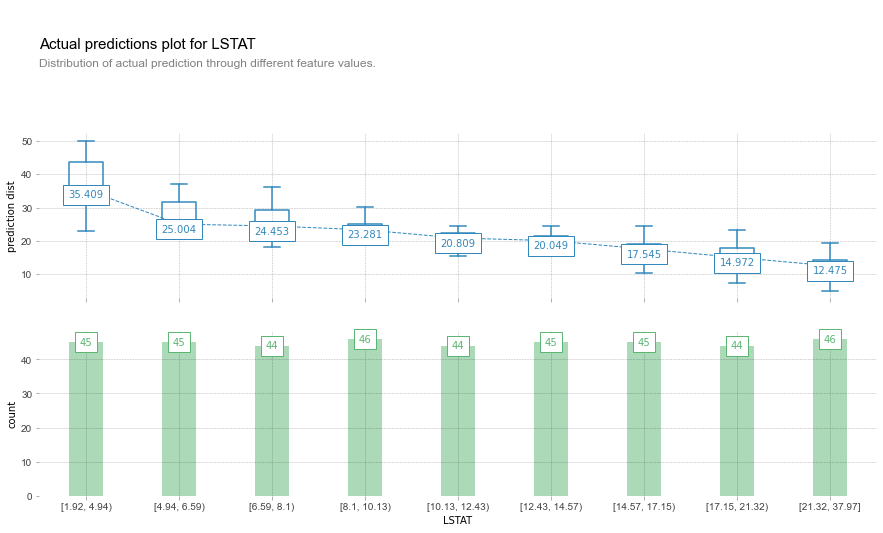

In [79]:
# impact of LSTAT on the housing price using pdp
fig, axes, df = info_plots.actual_plot(
    model=gbm, X=X_train, 
    feature="LSTAT", feature_name="LSTAT", predict_kwds={}
)

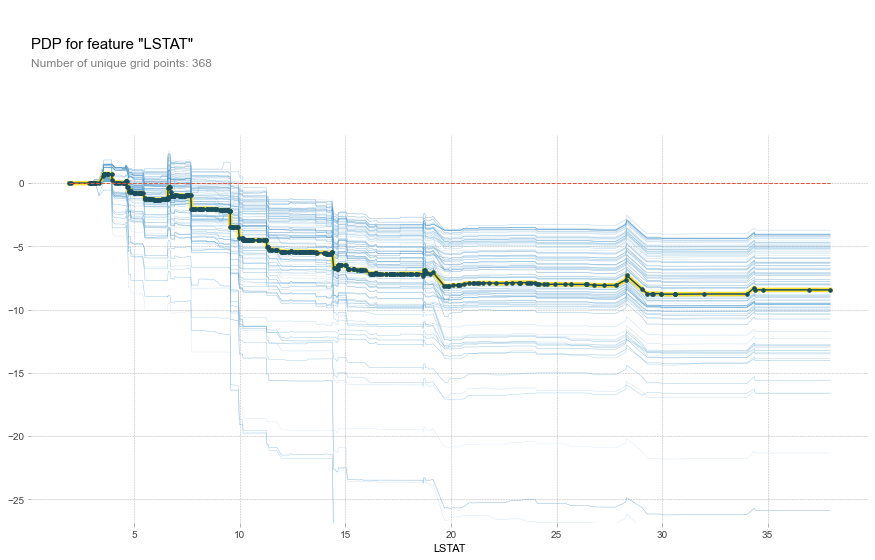

In [86]:
# additive impact of each unique value of LSTAT.
pdp_overall_qual = pdp.pdp_isolate(
    model=gbm, dataset=X_train, model_features=X.columns.tolist(), 
    feature="LSTAT", cust_grid_points=X_train["LSTAT"].unique().tolist()
)
fig, axes = pdp.pdp_plot(pdp_overall_qual, "LSTAT", plot_lines=True, frac_to_plot=100)

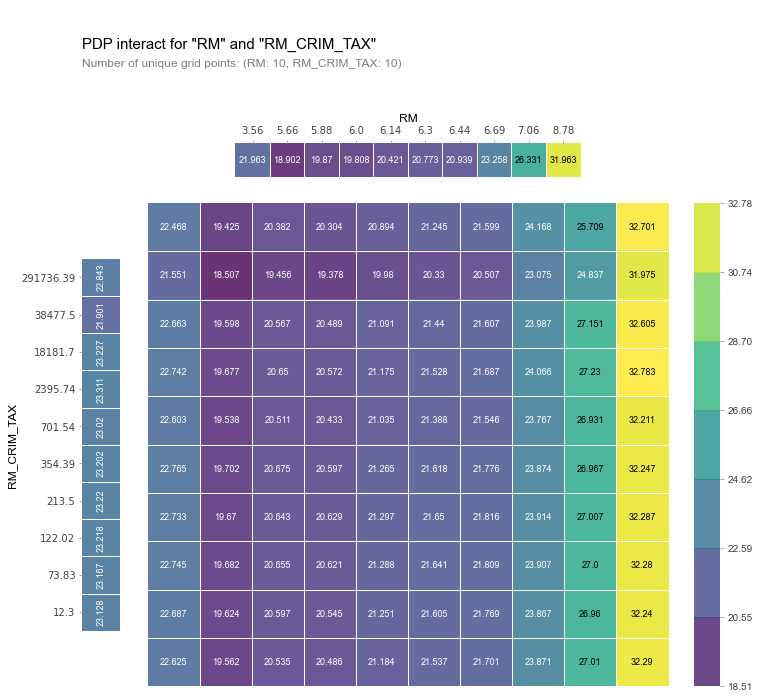

In [85]:
# interactions between RM and RM_CRIM_TAX (added feature)
gbm_inter = pdp.pdp_interact(
    model=gbm, dataset=X_train, model_features=X_train.columns, 
    features=["RM", "RM_CRIM_TAX"]
)


fig, axes = pdp.pdp_interact_plot(
    gbm_inter, ["RM", "RM_CRIM_TAX"], x_quantile=True, plot_type="grid", plot_pdp=True
)

In [14]:
# practising technique - removing outliers in the RM column to improve score
# I recognise this is not a valid way to improve the score, as the RM outliers do not seem to be inputting errors (so would just be ignoring unhelpful data)
#
q_upper = df["RM"].quantile(0.99)
q_lower = df["RM"].quantile(0.01)
df_filtered = df[(df["RM"] < q_upper) & (df["RM"] > q_lower)]
df_filtered

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [15]:
X = df_filtered.drop("PRICE", axis=1)
y = df_filtered["PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1990)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1990)
pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=1000))])

In [16]:
# get 10-fold validation score for the training set. 
cv_scores = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10)

# Scores have improved to 0.70 - 0.94 range
cv_scores

array([0.7643982 , 0.93459278, 0.89055712, 0.95997628, 0.8645609 ,
       0.92993918, 0.93631218, 0.90230337, 0.91007914, 0.95440174])

In [17]:
cv_scores.mean()

0.904712088404146

In [18]:
pipe.score(X_val, y_val)

0.8736443800914018